<a href="https://colab.research.google.com/github/emma-rose22/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1/assignment_applied_modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

##Cleaning
I am starting by copying in the cells I used in another notebook to clean up the data and merge my two sets together. I dropped measure and date from my mental health dataset because they are redundant/unnecessary.

I renamed the states in mental_health so it could merge easily with suicide_rates, and dropped the URL and year column once I selected my 2017 data, because it was unnecessary. 

In [0]:
import pandas as pd
import numpy as np

mental_health = pd.read_csv('https://github.com/emma-rose22/Mental_Health_build2/raw/master/Mental%20Health%20Data.csv')
mental_health.to_csv('mental_health_data.csv', encoding='utf-8')

In [0]:
mental_health = mental_health.drop('measure', axis = 1)
mental_health = mental_health.drop('Date', axis = 1)

In [0]:
mental_health['location'].replace(
    {'Alabama': 'AL',
    'Alaska' : 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    ' NV': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PI',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'}, inplace=True)
   

In [0]:
suicide_rate = pd.read_csv('https://github.com/emma-rose22/Mental_Health_build2/raw/master/Suicide%20Mortality%20by%20State.csv')
suicide_rate.to_csv('suicide_rate_data.csv', encoding='utf-8')

In [0]:
suicide_rate = suicide_rate[suicide_rate['YEAR'] == 2017.0]

In [0]:
suicide_rate = suicide_rate.drop('URL', axis = 1)
suicide_rate = suicide_rate.drop('YEAR', axis=1)

In [0]:
suicide_rate.rename(columns={'STATE':'location'}, inplace=True)

In [22]:
mental_health_clean = pd.merge(mental_health, suicide_rate,
how='left', on='location')

mental_health_clean.head(20)

,location,indicator,Unit,Value,RATE,DEATHS
0,United States,Adults with Disability who Could Not See a Doc...,Number,10663174.00,NaN,NaN
1,United States,Children with Private Insurance that Did Not C...,%,7.70,NaN,NaN
2,United States,Children with Private Insurance that Did Not C...,Number,884000.00,NaN,NaN
3,United States,Youth with Severe MDE who Received Some Consis...,%,23.40,NaN,NaN
4,United States,Youth with Severe MDE who Received Some Consis...,Number,447000.00,NaN,NaN
5,United States,Mental Health Workforce Availability,Population per mental health provider,536.00,NaN,NaN
6,United States,Youth with MDE who Did Not Receive Mental Heal...,%,63.00,NaN,NaN
7,United States,Youth with MDE who Did Not Receive Mental Heal...,Number,1548000.00,NaN,NaN
8,United States,Adults with Disability who Could Not See a Doc...,%,21.62,NaN,NaN
9,United States,Adults with AMI Reporting Unmet Need,%,20.10,NaN,NaN


In [0]:
mental_health_clean = mental_health_clean[mental_health_clean['location'] != 'United States']

In [80]:
mental_health_clean.head()

,location,indicator,Unit,Value,RATE,DEATHS
17,AL,Adults with AMI who are Uninsured,"Rank,1=Highest mental health provider",43.0,16.6,836
18,AL,Adults with AMI who Did Not Receive Treatment,Number,222000.0,16.6,836
19,AL,Adults with AMI who are Uninsured,%,19.3,16.6,836
20,AL,Adults with AMI who are Uninsured,Number,136000.0,16.6,836
21,AL,Adults with AMI Reporting Unmet Need,%,19.8,16.6,836


In [111]:
mental_health_clean['indicator'].value_counts()

Adults with Disability who Could Not See a Doctor Due to Costs                            153
Students Identified with Emotional Disturbance for an Individualized Education Program    153
Adults with AMI who Did Not Receive Treatment                                             153
Youth with MDE who Did Not Receive Mental Health Services                                 153
Youth with Severe MDE who Received Some Consistent Treatment                              153
Adults with AMI who are Uninsured                                                         153
Adults with AMI Reporting Unmet Need                                                      153
Children with Private Insurance that Did Not Cover Mental or Emotional Problems           153
Mental Health Workforce Availability                                                      102
Access to Care Ranking                                                                     51
Name: indicator, dtype: int64

In [110]:
pivot_health = pd.pivot_table(mental_health_clean,index=["location", 'DEATHS', 'RATE','indicator', 'Unit', ],values=["Value", 'RATE'])
pivot_health.head(30)

Value
location DEATHS RATE indicator                                          Unit                                            
AK       200    27.0 Access to Care Ranking                             Rank,1=Highest mental health provider      20.00
                     Adults with AMI Reporting Unmet Need               %                                          19.20
                                                                        Number                                  18000.00
                                                                        Rank,1=Highest mental health provider      15.00
                     Adults with AMI who Did Not Receive Treatment      %                                          63.90
                                                                        Number                                 436000.00
                                                                        Rank,1=Highest mental health provider      50.00
                     Adults with AMI who are Uninsured                  %                                          14.90
                                                                        Number                                  14000.00
                                                                        Rank,1=Highest mental health provider      30.00
                     Adults with Disability who Could Not See a Doct... %                                          20.98
                                                                        Number                                  23610.00
                                                                        Rank,1=Highest mental health provider      30.00
                     Children with Private Insurance that Did Not Co... %                                           7.60
                                                                        Number                                   2000.00
                                                                        Rank,1=Highest mental health provider      28.00
                     Mental Health Workforce Availability               Population per mental health provider     300.00
                                                                        Rank,1=Highest mental health provider       9.00
                     Students Identified with Emotional Disturbance ... Number                                    665.00
                                                                        Rank,1=Highest mental health provider      38.00
                                                                        per 1000 students                           5.66
                     Youth with MDE who Did Not Receive Mental Healt... %                                          53.10
                                                                        Number                                   3000.00
                                                                        Rank,1=Highest mental health provider       5.00
                     Youth with Severe MDE who Received Some Consist... %                                          35.10
                                                                        Number                                   1000.00
                                                                        Rank,1=Highest mental health provider       4.00
AL       836    16.6 Access to Care Ranking                             Rank,1=Highest mental health provider      48.00
                     Adults with AMI Reporting Unmet Need               %                                          19.80
                                                                        Number                                 140000.00

##I may have to divide my dataset into smaller datasets
I am leaving this here until I decide I need to. The pivot table is really hard to work with so I am going back to the original dataframe and am going to see if that works even though it is very unorganized. 

In [0]:
adult_ami_uninsured= (mental_health_clean[mental_health_clean['indicator'] == 'Adults with AMI who are Uninsured'])	

In [0]:
adult_ami_uninsured = pd.DataFrame(adult_ami_uninsured)

In [0]:
adult_ami_uninsured = adult_ami_uninsured.rename(columns={'Value': 'Adults with AMI who are uninsured'})

In [0]:
adult_ami_uninsured = adult_ami_uninsured.drop('indicator', axis = 1)

In [103]:
adult_ami_uninsured.head()

,location,Unit,Adults with AMI who are uninsured,RATE,DEATHS
17,AL,"Rank,1=Highest mental health provider",43.0,16.6,836
19,AL,%,19.3,16.6,836
20,AL,Number,136000.0,16.6,836
60,AK,%,14.9,27.0,200
62,AK,Number,14000.0,27.0,200


##- [X] Choose your target. Which column in your tabular dataset will you predict?

I am trying to find a relationship between the amount of readily available mental health care and suicide rate for each state, and then predict suicide rates based off of this relationship.

This leaves two options for my target, either the raw number of deaths/state in 2017, or the rate of deaths. I found this simplfication of the data hard to understand, on the CDC website you follow several links and asterisks to find a definition of death rates modulated by age, the process of which was detailed in a paper that came out the year I was born. This tells me that the rate of deaths are per 100,000 and since that will be the easiest to compare across states, I will use the rate of deaths as my target. 

https://www.cdc.gov/nchs/data/nvsr/nvsr47/nvs47_03.pdf

In [113]:
mental_health_clean.head()

,location,indicator,Unit,Value,RATE,DEATHS
17,AL,Adults with AMI who are Uninsured,"Rank,1=Highest mental health provider",43.0,16.6,836
18,AL,Adults with AMI who Did Not Receive Treatment,Number,222000.0,16.6,836
19,AL,Adults with AMI who are Uninsured,%,19.3,16.6,836
20,AL,Adults with AMI who are Uninsured,Number,136000.0,16.6,836
21,AL,Adults with AMI Reporting Unmet Need,%,19.8,16.6,836


In [0]:
target = mental_health_clean['Value']

 ## - [X] Is your problem regression or classification?
 
 My problem is a regression problem, because I am trying to see if the number of people that commit suicide can be predicted based off of the resources a state provides. Since I am looking at the numbers of suicides, and not if a particular person is at risk, this is not classification. 

##- [X] How is your target distributed?

In [0]:
adult_ami_uninsured= (mental_health_clean[mental_health_clean['indicator'] == 'Adults with AMI who are Uninsured'])	

In [0]:
mental_health_clean = (mental_health_clean[mental_health_clean['Unit'] == '%'])

In [115]:
print(mental_health_clean.shape)
mental_health_clean.head()

(357, 6)


,location,indicator,Unit,Value,RATE,DEATHS
19,AL,Adults with AMI who are Uninsured,%,19.30,16.6,836
21,AL,Adults with AMI Reporting Unmet Need,%,19.80,16.6,836
29,AL,Adults with AMI who Did Not Receive Treatment,%,54.00,16.6,836
36,AL,Children with Private Insurance that Did Not C...,%,11.50,16.6,836
37,AL,Adults with Disability who Could Not See a Doc...,%,25.65,16.6,836


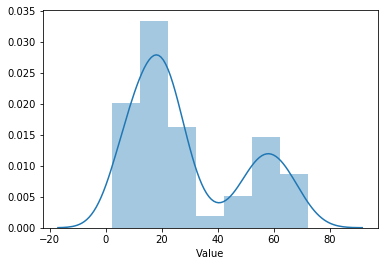

In [118]:
import seaborn as sns
sns.distplot(target);

#I am waiting to see if this is something I should mess with, I already took out 
#all of the values that weren't % because that graph was really messed up lol.

In [119]:
target.describe()

count    357.000000
mean      29.047924
std       19.854986
min        2.400000
25%       14.400000
50%       21.400000
75%       50.600000
max       72.200000
Name: Value, dtype: float64

##- [ ] Choose your evaluation metric(s).

    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

I am going to use R^2 because I will be using cross-validation and I have used those together in the past. 

 [ ] Choose which observations you will use to train, validate, and test your model
 
 I am going to randomly hold 20% of the data for testing, for the rest I will use cross validation because my dataset is so small. I am not going to write the code for that now because the data exploration and troubleshooting I did earlier ate up a lot of my time.

- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?


I guess I did this assignment a little backwards, I already did much of this, other than visualizations, up above where I was struggling with the pivot table. 